### Valve model

$VP_{(n)} = e^{ \frac{-1}{\tau_{valve}}} \times VP_{(n-1)} + K_{valve} \times (1 - e^{ \frac{-1}{\tau_{valve}}}) \times Input_{FF}$


$PV_{flow(n)} = e^{ \frac{-1}{\tau_{flow}}} \times PV_{flow(n-1)} + K_{flow} \times (1 - e^{ \frac{-1}{\tau_{flow}}}) \times VP_{(n-1)}$


Control Valve Stiction: Experimentation, Modeling, Model Validation and Detection with Convolution Neural Network
- Napoli R. Vazquez, Dan P. Fernandes, and Daniel H. Chen

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy import signal

In [2]:
PLOT_WIDTH = 12
PLOT_HEIGHT = 3

SIMULATE_FOR_s = 1     # Simulate for N seconds
SAMPLING_FREQ_Hz = 500 # i.e. points per second

INPUT_FF_HIGH = 10     # Input forcing magnitude
INPUT_FREQ_Hz = 5      # Input forcing frequency (i.e. square signal cycles per second)
DUTY_CYCLE = 0.7
NOISE = True
NOISE_MEAN = 0
NOISE_STD = 0.5

PV_DELAY = 10

K_valve = 2.85
Tau_valve = 1.00

K_flow = 2.00
Tau_flow = 1.20

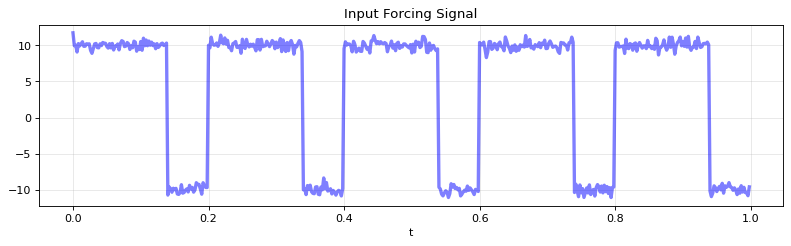

In [3]:
# Example: A 5 Hz waveform sampled at 500 Hz for 1 second:
t = np.linspace(0, SIMULATE_FOR_s, SAMPLING_FREQ_Hz, endpoint=False)
u = INPUT_FF_HIGH*signal.square(2*np.pi*(INPUT_FREQ_Hz*t), duty=DUTY_CYCLE)

if (NOISE):
    u = u + np.random.normal(NOISE_MEAN, NOISE_STD, len(u))

figure(figsize=(PLOT_WIDTH, PLOT_HEIGHT), dpi=80)

plt.plot(t, u, 'b', alpha=0.5, linewidth=3, label='input')
plt.title('Input Forcing Signal')
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

In [4]:
N = len(u)
VP = np.zeros(N)
PV = np.zeros(N)

for n in range(PV_DELAY, N):
    VP[n]  = np.exp(-1/Tau_valve) * VP[n-1] + K_valve * (1 - np.exp(-1/Tau_valve)) * u[n]
    PV[n]  = np.exp(-1/Tau_flow) * PV[n-1] + K_flow * (1 - np.exp(-1/Tau_flow)) * VP[n-PV_DELAY]

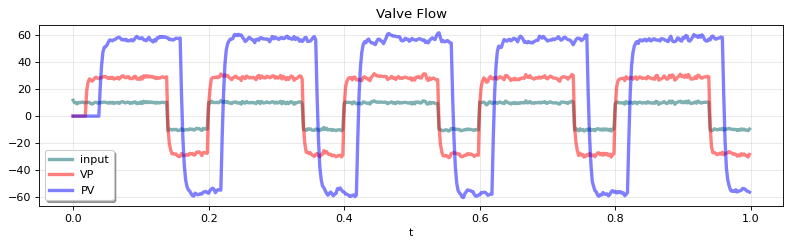

In [5]:
#plt.style.use('seaborn-pastel')

figure(figsize=(PLOT_WIDTH, PLOT_HEIGHT), dpi=80)
plt.plot(t, u,  'cadetblue', alpha=0.8, linewidth=3, label='input')
plt.plot(t, VP, 'r', alpha=0.5, linewidth=3, label='VP')
plt.plot(t, PV, 'b', alpha=0.5, linewidth=3, label='PV')

plt.legend(shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.title('Valve Flow')
plt.show()

In [ ]:
class Valve(gym.Env):
    """
    Valve Environment that follows gym interface
    VP: Valve position
    PV: Process variable e.g. Temperature, flow, pressure etc.
    
    Action: Input is the Control Signal 
    Observation: Valve output (valve response) is the VP, PV, reward
    """
    
    # Not implemented the GUI ('human' render mode)
    metadata = {'render.modes': ['console']}
    
    # Define constants for clearer code
    NOISE = True
    NOISE_MEAN = 0.0
    NOISE_STD = 0.5

    PV_DELAY = 10

    K_valve = 2.85
    Tau_valve = 1.00

    K_flow = 2.00
    Tau_flow = 1.20
    
    def __init__(self, K_valve = 2.85, Tau_valve = 1.00, 
                 K_flow = 2.00, Tau_flow = 1.20):
        
        super(Valve, self).__init__()

        # Define valve model parameters
        self.K_valve = K_valve
        self.Tau_valve = Tau_valve

        self.K_flow = K_flow
        self.Tau_flow = Tau_flow
    
        # Initialize the valve position and process variable
        self.VP = 0.0
        self.PV = 0.0

        # Define action and observation space as gym.spaces objects
        # Continous actions so use Box type
        
        high = np.inf 
        low = -high
        self.action_space = spaces.Box(low=low, high=high) 
        
        # The observation will be the valve response (VP and PV)
        self.observation_space = spaces.Box(low=low, high=high
                                            shape=(1,1), dtype=np.float32)
        
    def reset(self):
        """
        Important: the observation must be a numpy array
        :return: (np.array) 
        """

        # Initialize the valve position and process variable
        self.VP = 0.0
        self.PV = 0.0

        # here we convert to float32 to make it more general (in case we want to use continuous actions)
        # return np.array([self.VP, self.PV]).astype(np.float32)
        return np.array([self.VP, self.PV])

    def step(self, action):
        # self.VP = np.exp(-1/self.Tau_valve) * self.VP_prev + K_valve * (1 - np.exp(-1/Tau_valve)) * u[n]
        # self.PV = np.exp(-1/self.Tau_flow) * PV[n-1] + K_flow * (1 - np.exp(-1/Tau_flow)) * VP[n-PV_DELAY]

        self.VP = np.exp(-1/self.Tau_valve)
        self.PV = np.exp(-1/self.Tau_flow)

        # Are we at the left of the grid?
        ## if ()
        ### done = bool(self.agent_pos == 0)

        reward = 0.0 

        # Optionally we can pass additional info, we are not using that for now
        info = {}

        return (np.array([self.VP, self.PV]), reward, done, info)


    def render(self, mode='console'):
        if mode != 'console':
            raise NotImplementedError()
        # agent is represented as a cross, rest as a dot
        print(".", end="")

    def close(self):
        pass

In [10]:
x

array(2)